## Step 1: Problem Definition :-

#### Objective: The goal is to develop a machine learning model to predict whether a customer will subscribe to a term deposit (binary classification problem: 'yes' or 'no').

#### Dataset: The data is from a Portuguese bank’s direct marketing campaigns, primarily telephonic, aimed at selling term deposits.

##  Import Libraries and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Collection :-

#### Source: The dataset includes two CSV files (train.csv and test.csv).

In [3]:
# Load datasets
df_1 = pd.read_csv(r"C:\Users\Hp\Downloads\test (2).csv",sep=';')
df_2 = pd.read_csv(r"C:\Users\Hp\Downloads\train.csv", sep=';')

In [4]:
# Combining both train Test Datasets

df = pd.concat([df_1,df_2],ignore_index=True)

## Step:3 Data Understanding 

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [7]:
round(df.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,49732.00,49732.00,49732.00,49732.00,49732.00,49732.00,49732.00
mean,40.96,1367.76,15.82,258.69,2.77,40.16,0.58
std,10.62,3041.61,8.32,257.74,3.10,100.13,2.25
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1431.00,21.00,320.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [8]:
print('Number of the Rows',df.shape[0])
print('Number of the Column',df.shape[1])

Number of the Rows 49732
Number of the Column 17


In [9]:
# Checking data types

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Step 4: Data Preprocessing & Cleaning 

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [12]:
features_na = [features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().sum(),4), '% missing values')
else:
    print('No missing value found')

No missing value found


### Find features with one value

In [13]:
for column in df.columns:
    if len(df[column].unique()) == 1:
        print(f"Feature '{column}' has only one unique value.")

In [14]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


### Explore the categorical features

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for feature in categorical_features:
  print(f"Feature: {feature}")
  print(f"Unique Values: {df[feature].unique()}")
  print(f"Value Counts: \n{df[feature].value_counts()}")
  print("-" * 20)

Feature: job
Unique Values: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Value Counts: 
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64
--------------------
Feature: marital
Unique Values: ['married' 'single' 'divorced']
Value Counts: 
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64
--------------------
Feature: education
Unique Values: ['primary' 'secondary' 'tertiary' 'unknown']
Value Counts: 
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64
--------------------
Feature: default
Unique Values: ['no' 'yes']
Value Counts: 
no     48841
yes      8

In [16]:
for feature in categorical_features:
  if feature != 'y':  # Exclude the target variable itself
    print(f"Relationship between '{feature}' and 'y':")
    print(pd.crosstab(df[feature], df['y']))
    print("-" * 20)

Relationship between 'job' and 'y':
y                no   yes
job                      
admin.         4960   689
blue-collar    9901   777
entrepreneur   1517   138
housemaid      1229   123
management     8995  1432
retired        1924   570
self-employed  1555   207
services       4164   407
student         734   288
technician     7442   923
unemployed     1216   215
unknown         285    41
--------------------
Relationship between 'marital' and 'y':
y            no   yes
marital              
divorced   5036   699
married   26979  3032
single    11907  2079
--------------------
Relationship between 'education' and 'y':
y             no   yes
education             
primary     6874   655
secondary  22813  2695
tertiary   12462  2189
unknown     1773   271
--------------------
Relationship between 'default' and 'y':
y           no   yes
default             
no       43092  5749
yes        830    61
--------------------
Relationship between 'housing' and 'y':
y           no   yes
h

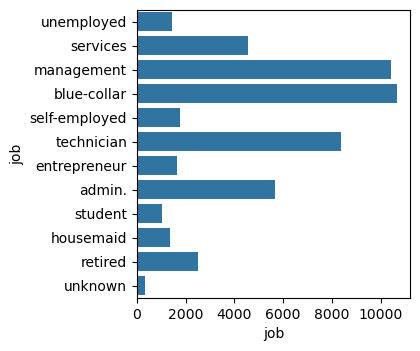

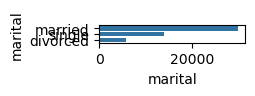

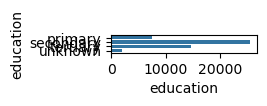

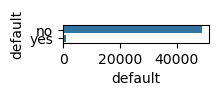

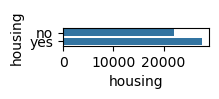

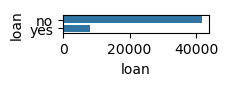

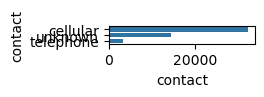

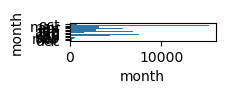

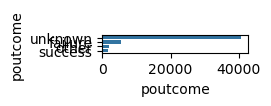

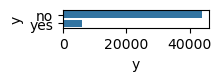

In [17]:
plt.figure(figsize=(12,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(18,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.ylabel(categorical_feature)
    plotnumber+=1
    plt.show()

### Relationship between categorical features and label

In [18]:
for categorical_feature in categorical_features:
    print(categorical_feature)

job
marital
education
default
housing
loan
contact
month
poutcome
y


In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numerical_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [20]:
for numerical_feature in numerical_features:
  print(f"Feature: {numerical_feature}")
  print(f"Descriptive Statistics: \n{df[numerical_feature].describe()}")
  print("-" * 20)

Feature: age
Descriptive Statistics: 
count    49732.000000
mean        40.957472
std         10.615008
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
--------------------
Feature: balance
Descriptive Statistics: 
count     49732.000000
mean       1367.761562
std        3041.608766
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1431.000000
max      102127.000000
Name: balance, dtype: float64
--------------------
Feature: day
Descriptive Statistics: 
count    49732.000000
mean        15.816315
std          8.315680
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
--------------------
Feature: duration
Descriptive Statistics: 
count    49732.000000
mean       258.690179
std        257.743149
min          0.000000
25%        103.000000
50%        180.000000
75%        320.000000
max 


## Step 4: Exploratory Data Analysis (EDA)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18176\3526648938.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


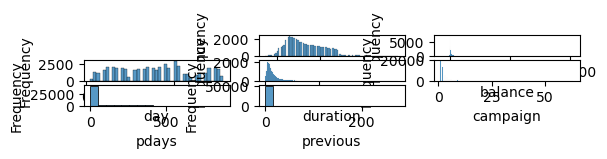

In [21]:
for numerical_feature in numerical_features:
  ax = plt.subplot(15, 3, plotnumber)
  sns.histplot(df[numerical_feature])
  plt.xlabel(numerical_feature)
  plt.ylabel('Frequency')
  plotnumber += 1

plt.tight_layout()
plt.show()

In [22]:
discrete_numerical_features = []
for feature in numerical_features:
  if df[feature].nunique() < 20:  # Adjust this threshold as needed
    discrete_numerical_features.append(feature)

print("Discrete Numerical Features:")
print(discrete_numerical_features)

Discrete Numerical Features:
[]


In [23]:
continuous_numerical_features = [
    feature for feature in numerical_features
    if feature not in discrete_numerical_features
]

print("Continuous Numerical Features:")
print(continuous_numerical_features)

plt.figure(figsize=(12, 8))
plotnumber = 1

Continuous Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


<Figure size 1200x800 with 0 Axes>

C:\Users\Hp\AppData\Local\Temp\ipykernel_18176\2085619973.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


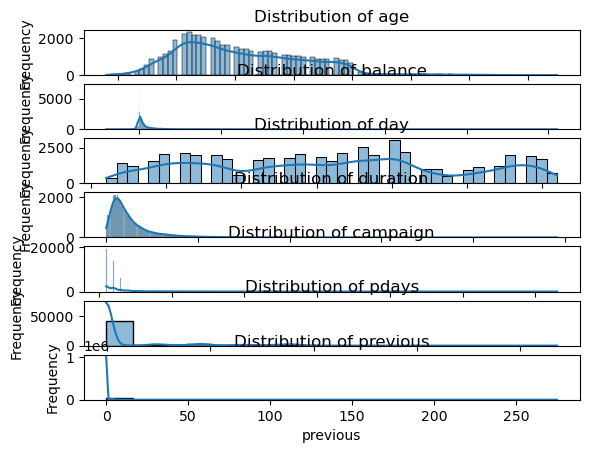

In [24]:
for numerical_feature in continuous_numerical_features:
    ax = plt.subplot(len(continuous_numerical_features), 1, plotnumber)
    sns.histplot(df[numerical_feature], kde=True)
    plt.title(f"Distribution of {numerical_feature}")
    plt.xlabel(numerical_feature)
    plt.ylabel("Frequency")
    plotnumber += 1

plt.tight_layout()
plt.show()

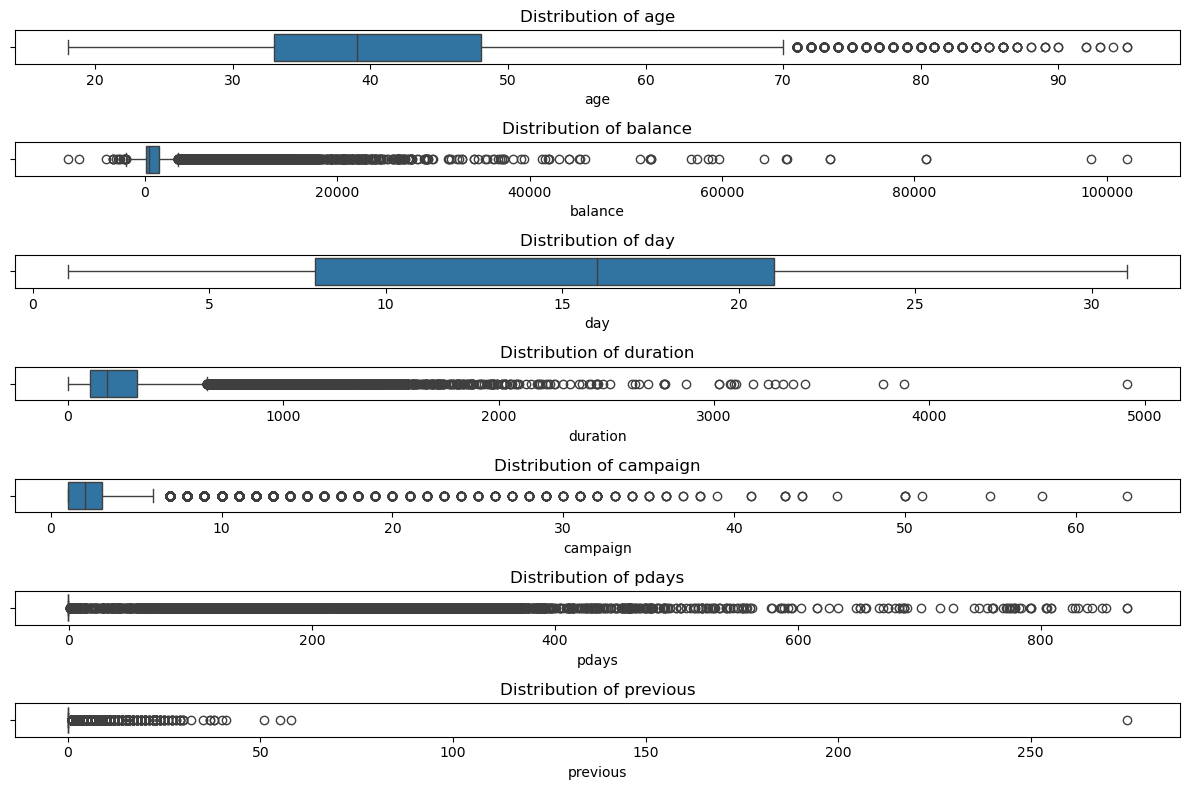

In [25]:
plt.figure(figsize=(12, 8))
plotnumber = 1
for numerical_feature in continuous_numerical_features:
  ax = plt.subplot(len(continuous_numerical_features), 1, plotnumber)
  sns.boxplot(x=df[numerical_feature])
  plt.title(f"Distribution of {numerical_feature}")
  plt.xlabel(numerical_feature)
  plotnumber += 1

plt.tight_layout()
plt.show()

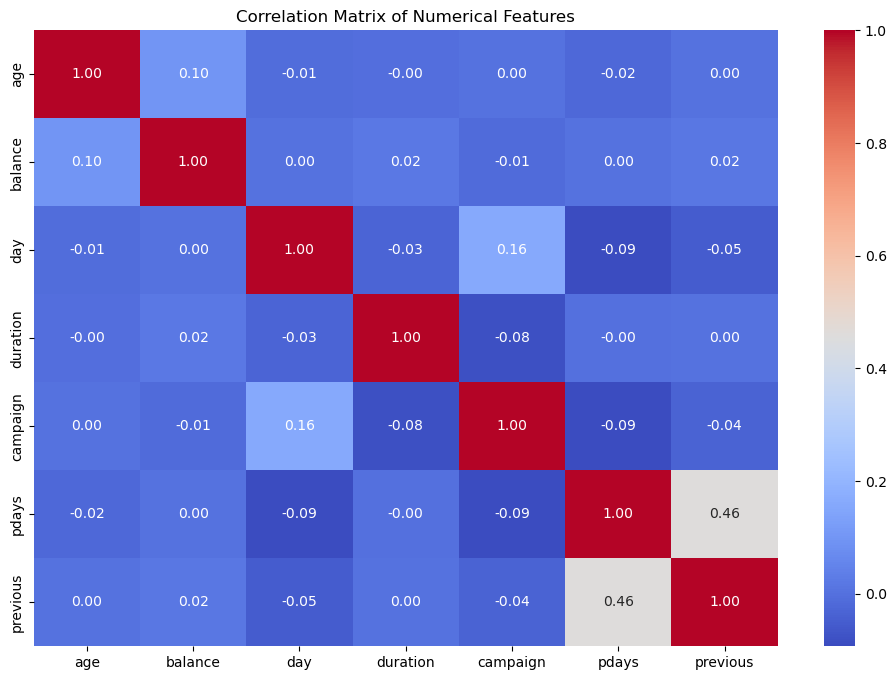

In [26]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

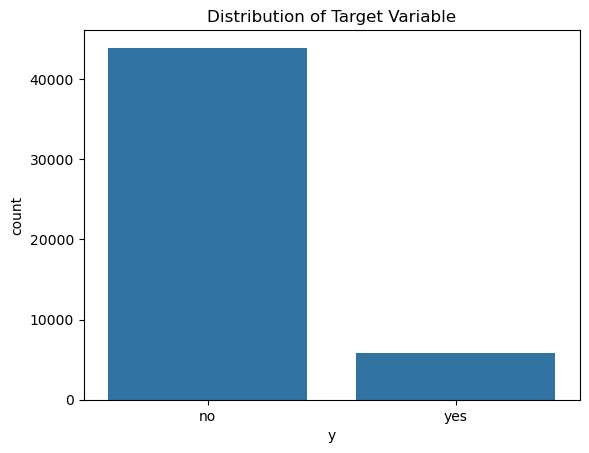

In [27]:
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [28]:
df['y'].groupby(df['y']).count()

y
no     43922
yes     5810
Name: y, dtype: int64

##  Step 6: Feature Engineering :- 

In [29]:
df2=df.copy()


In [30]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [31]:
df2.shape

(49732, 17)

In [32]:
df2.groupby(['y','default']).size()

y    default
no   no         43092
     yes          830
yes  no          5749
     yes           61
dtype: int64

In [33]:
df2.drop('default',axis=1,inplace=True)

In [34]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       36938
      1           9
      2          42
      3           2
      4           1
              ...  
yes   804         2
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [35]:
df2.drop('pdays',axis=1,inplace=True)

In [36]:
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     39
20     53
21     86
22    138
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [37]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      2
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [38]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           16
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [39]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           16477
     2           12230
     3            5404
     4            3487
     5            1783
                 ...  
yes  20              1
     21              1
     24              2
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [40]:
df3 = df2[df2['campaign']<25]

In [41]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           16477
     2           12230
     3            5404
     4            3487
     5            1783
     6            1338
     7             757
     8             560
     9             334
     10            278
     11            207
     12            171
     13            142
     14             99
     15             89
     16             85
     17             69
     18             58
     19             47
     20             45
     21             36
     22             25
     23             24
     24             21
yes  1            2801
     2            1539
     3             675
     4             360
     5             148
     6             108
     7              53
     8              36
     9              23
     10             15
     11             16
     12              5
     13              8
     14              4
     15              4
     16              2
     17              7
     20              1
     21             

In [42]:
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           36782
     1            2424
     2            1793
     3             939
     4             596
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [43]:
df4 = df3[df3['previous']<31]

In [44]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    df3 = pd.concat([df3.drop(col, axis=1),pd.get_dummies(df3[col],prefix_sep='_',drop_first=True,dummy_na=False)], axis=1)

In [45]:
bool_columns = ['housing', 'loan','y']
for col in bool_columns:
    if col in df3.columns:  # Check if the column exists before processing
        df3[col+'_new']=df3[col].apply(lambda x : 1 if x == 'yes' else 0)
        df3.drop(col,axis=1,inplace=True)

In [46]:
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,4,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,0,unknown,no


## Step 7: Model Selection

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df3.drop('y_new', axis=1)
y = df3['y_new']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
len(X_train)

39659

In [51]:
len(X_test)

9915

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    
}

In [55]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9220373171961674
Precision: 0.7263427109974424
Recall: 0.5039929015084295
F1-Score: 0.5950759559979046


In [56]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9077155824508321
Precision: 0.6948529411764706
Recall: 0.33540372670807456
F1-Score: 0.4524236983842011


In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9039838628340897
Precision: 0.6460767946577629
Recall: 0.3433895297249335
F1-Score: 0.4484356894553882


In [58]:
for model_name, model in models.items():
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  print(f"{model_name}:")
  print(f"Cross-validation scores: {cv_scores}")
  print(f"Mean cross-validation score: {np.mean(cv_scores)}")
  print("-" * 20)

Logistic Regression:
Cross-validation scores: [0.89977307 0.90191629 0.90456379 0.89889057 0.89849956]
Mean cross-validation score: 0.9007286560655243
--------------------
Random Forest:
Cross-validation scores: [0.91313666 0.91780131 0.91843167 0.91515381 0.90946917]
Mean cross-validation score: 0.9147985241848614
--------------------
Support Vector Machine:
Cross-validation scores: [0.90330308 0.90330308 0.90733737 0.90204236 0.89887782]
Mean cross-validation score: 0.9029727402375494
--------------------


In [59]:
for model_name, model in models.items():
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  print(f"{model_name}:")
  print(f"Cross-validation scores: {cv_scores}")
  print(f"Mean cross-validation score: {np.mean(cv_scores)}")
  print("-" * 20)

Logistic Regression:
Cross-validation scores: [0.89977307 0.90191629 0.90456379 0.89889057 0.89849956]
Mean cross-validation score: 0.9007286560655243
--------------------
Random Forest:
Cross-validation scores: [0.91490166 0.91578417 0.91855774 0.91212809 0.90984743]
Mean cross-validation score: 0.9142438186443297
--------------------
Support Vector Machine:
Cross-validation scores: [0.90330308 0.90330308 0.90733737 0.90204236 0.89887782]
Mean cross-validation score: 0.9029727402375494
--------------------
